* Student name: WILLIAM OMONDI NDONI
* Student pace:  full time 

## Business Understanding
WON Real Estate Limited is a real estate company located in the American Northwest that buys and sells houses to its clients. The company would like to develop a model that can estimate the price of a house based on its features. In addition,the company would like to know which features best estimate the house prices.

This project will help identify the features that can be used to provide a good estimate of the house prices.The project will also develop a model that can estimate the house prices and evaluate its performance.

## Data understanding
The data used in this project was obtained from [kaggle website](https://www.kaggle.com/datasets/shivachandel/kc-house-data). This dataset contains the prices of houses in the American Northwest and their various features such as,the number of bathrooms and the number of bedrooms.These are contained in the various columns of the dataset.

The dataset contains twenty one columns that are the features(characteristics) of the houses.The main aim of this project is to estimate the prices of houses that are contained in the 'price' column.
This dataset will therefore be of use since the company is also in the Northwest.

## Data Preparation

### Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
sns.set()

#### Loading and exploring the dataset

In [2]:
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
## Getting information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

 From the documentation provided on columns we can clearly identify columns such as waterfront,grade,condition and view as categorical.We will further investigate to identify whether there are other categorical columns

In [4]:
## Taking a look at the  sqft_basement column which is seen to be an object data type 
df['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [5]:
df['sqft_basement'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object>

In [6]:
df[df['sqft_basement']== '?']['sqft_basement'].count()

454

In [7]:
## Replacing ? with zero,considering those to be houses without a basement

In [8]:
df['sqft_basement'] = df['sqft_basement'].replace('?',0)
df[df['sqft_basement']== 0 ]['sqft_basement'].count()

454

In [9]:
## Converting the column to a float
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)
df['sqft_basement'].dtype

dtype('float64')

The date column is an object data type. Converting it to a datetime object would make it more useful to the model.

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [11]:
## Taking a look at the grade and condition columns
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [12]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [13]:
## Changing the grade column to only remain with strings ie removing the numbers
df['grade'] = df['grade'].map(lambda x: x[1:])
df['grade']

0             Average
1             Average
2         Low Average
3             Average
4                Good
             ...     
21592            Good
21593            Good
21594         Average
21595            Good
21596         Average
Name: grade, Length: 21597, dtype: object

In [14]:
## Stripping the spaces
df['grade'] = df['grade'].apply(lambda x: x.rstrip())
df['grade']

0             Average
1             Average
2         Low Average
3             Average
4                Good
             ...     
21592            Good
21593            Good
21594         Average
21595            Good
21596         Average
Name: grade, Length: 21597, dtype: object

### Dropping irrelevant columns

From the documentation it can be known that some columns will be irrelevant to our project. This is because the have no predictive power,for instance the zipcode,lat and long columns. A house buyer or seller doesn't look at the latitudes or longitudes in order to consider buying a house (in the case of buyer) or prizing a house(in the case of a seller).The year renovated will not be considered relevant, provided the condition of the house is in our model there will be no use of the yr_renovated column. In addition it has missing values.

This is the list of columns to be dropped since they are not  considered relevant to our model = `['zipcode','lat','long','yr_renovated']`

In [15]:
df_r = df.drop(['zipcode','lat','long','yr_renovated'],axis = 1)
print(df.shape)
df_r.head()


(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,Average,1180,0.0,1955,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,Average,2170,400.0,1951,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,Low Average,770,0.0,1933,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,Average,1050,910.0,1965,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,Good,1680,0.0,1987,1800,7503


### Dealing with missing values

In [16]:
df_r.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
## The waterfront and view columns have missing values both are categorical columns
## Taking a look at the view column
df_r['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Houses with no view ie NONE occur  the most. We can replace the missing values with NONE

In [18]:
## Replacing the missing values in the view column with NONE
df_r['view'].fillna('NONE',inplace = True)
df_r['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [19]:
## Taking a look at the waterfront column
df_r['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Dropping the rows with the missing values will not be a good idea since the number of missing values in the waterfront column is more than 2300. We will be removing more than 10% of our dataset. A rule of thumb is that we are not supposed to drop more than 5% of the entire dataset.Since houses with no waterfront occur the most it is more reasonable to replace the missing values with 'NO'. They will be considered as houses with no waterfront.

In [20]:
## Replacing the missing values in the waterfront column with NO
df_r['waterfront'].fillna('NO',inplace = True)
df_r['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [21]:
df_no_mv = df_r.copy()
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  sqft_living15  2159

### Dealing with duplicates

In order to identify duplicates we need to set the subset to the id and date columns. A house can be sold twice but not on the same date. Factors such as the condition/grade might have changed its price.

In [22]:
df_no_mv.duplicated(subset = ['id','date']).sum()

0

In [23]:
## The dataset has no missing values

In [24]:
## droping the id column
df_no_mv.drop('id',axis = 1,inplace = True)

### Exploring the distributions and dealing with outliers

Most often non normality in the variables is associated with non normality in the errors(residuals).We can ensure normality in our variables before modelling and still confirm afterwards.Outliers will also be delt with since they also affect the distributions of our variables. We will focus on removing more extreme outliers and therefore the distributions may not be completely normal. This will still help improve our model.

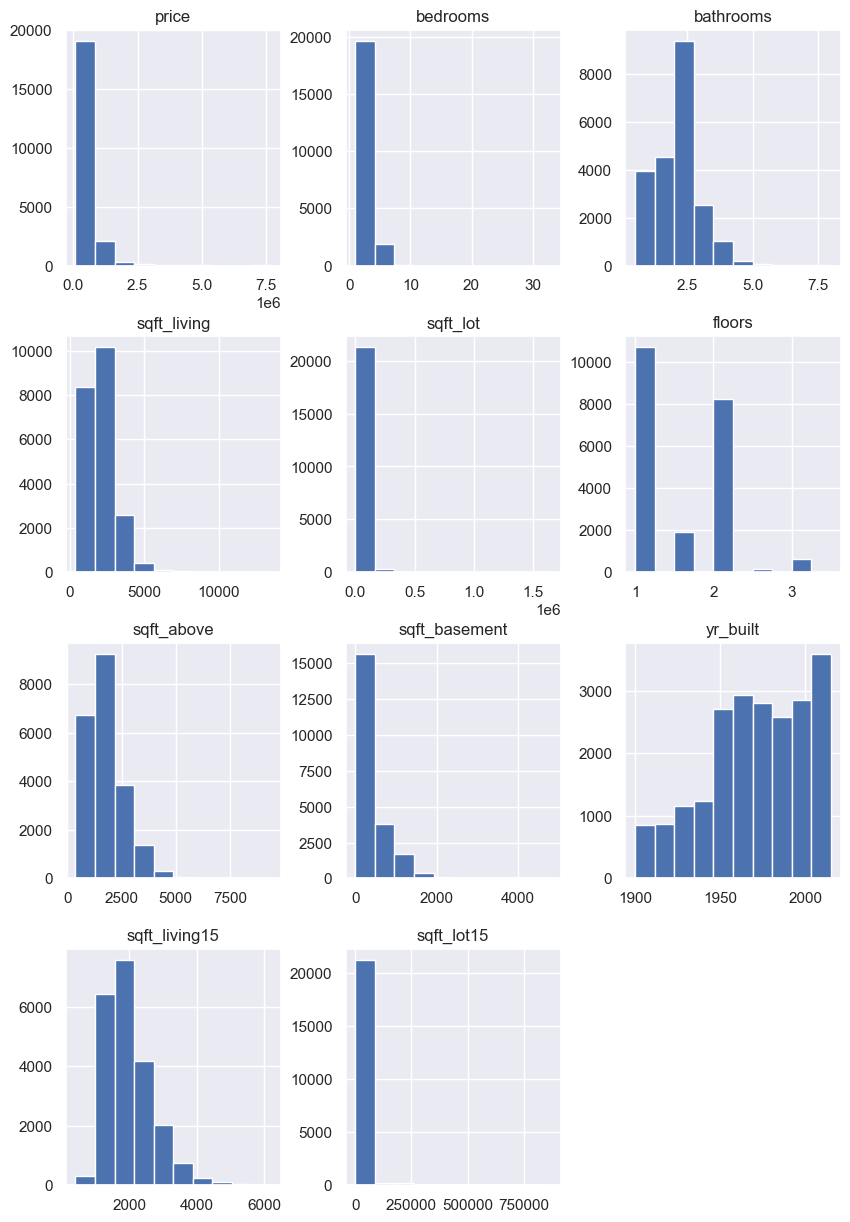

In [25]:
### creating histograms of the numerical columns
df_num = df_no_mv.select_dtypes('number')
df_num.hist(figsize = (10,15));

#### Dealing with the price column

In [26]:
## Exploring the descriptive statistics of price
df_no_mv['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Clearly the column has outliers.Price is also distributed exponentially.
We will deal with the outliers first.

In [27]:
## Having a look at the 99th and 1 percentile
p = df_no_mv['price'].quantile(q = .99)
p

1970000.0

The 99th percentile is not that large unlike the maximum value of 7+ million dollars.

In [28]:
## Removing the outliers in price
df_no_mv = df_no_mv[df_no_mv['price'] <= p]
df_no_mv['price'].describe()

count    2.138300e+04
mean     5.185033e+05
std      2.852752e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.970000e+06
Name: price, dtype: float64

<Axes: >

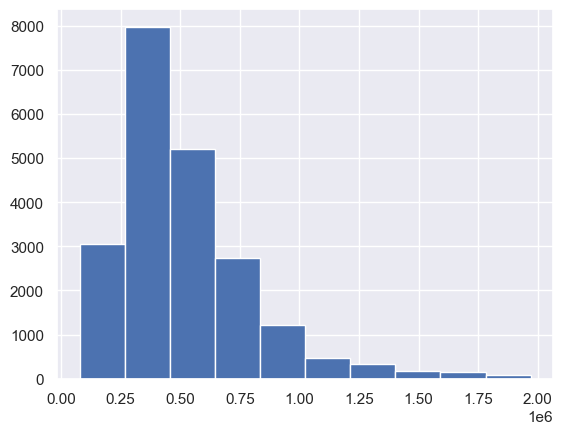

In [29]:
df_no_mv['price'].hist()

#### Dealing with the bedrooms,bathrooms and floors columns

We will consider these columns to be numerical. Having a high number of dummies makes it difficult to interpret the model. Also columns such as bedrooms can have varying values.

In [30]:
## Checking the bedrooms column
df_no_mv['bedrooms'].value_counts()

3     9789
4     6786
2     2758
5     1540
6      259
1      196
7       33
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [31]:
## Taking only the houses with 8 bedrooms or less to deal with outliers
df_no_mv = df_no_mv[df_no_mv['bedrooms']<=8]
df_no_mv.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.137200e+04,21372.000000,21372.000000,21372.000000,2.137200e+04,21372.000000,21372.000000,21372.000000,21372.000000,21372.000000,21372.000000
mean,5.183498e+05,3.359349,2.097873,2050.463784,1.498918e+04,1.490127,1766.233530,278.339182,1970.999953,1971.836889,12689.737928
std,2.851825e+05,0.888269,0.744239,860.752698,4.097832e+04,0.538878,791.225062,427.491833,29.297516,668.193267,27178.072637
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.027000e+03,1.000000,1190.000000,0.000000,1952.000000,1480.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.578500e+03,1.500000,1550.000000,0.000000,1975.000000,1830.000000,7600.000000
75%,6.350000e+05,4.000000,2.500000,2520.000000,1.054800e+04,2.000000,2190.000000,530.000000,1997.000000,2340.000000,10021.250000
max,1.970000e+06,8.000000,6.750000,7730.000000,1.651359e+06,3.500000,7420.000000,3260.000000,2015.000000,5790.000000,871200.000000


<Axes: >

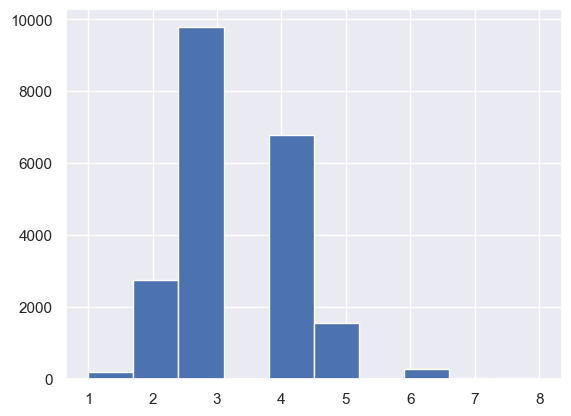

In [32]:
df_no_mv['bedrooms'].hist()

In [33]:
df_no_mv['floors'].describe()

count    21372.000000
mean         1.490127
std          0.538878
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

The floors column has no outliers

In [34]:
df_no_mv['bathrooms'].describe()

count    21372.000000
mean         2.097873
std          0.744239
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          6.750000
Name: bathrooms, dtype: float64

In [35]:
## Removing the outliers in the bathrooms column
bath= df_no_mv['bathrooms'].quantile(q = 0.99)
df_no_mv = df_no_mv[df_no_mv['bathrooms']<=bath]
df_no_mv['bathrooms'].describe()

count    21183.000000
mean         2.075650
std          0.708096
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          4.000000
Name: bathrooms, dtype: float64

The maximum value in the bathrooms columns is not that far from the 75 percentile

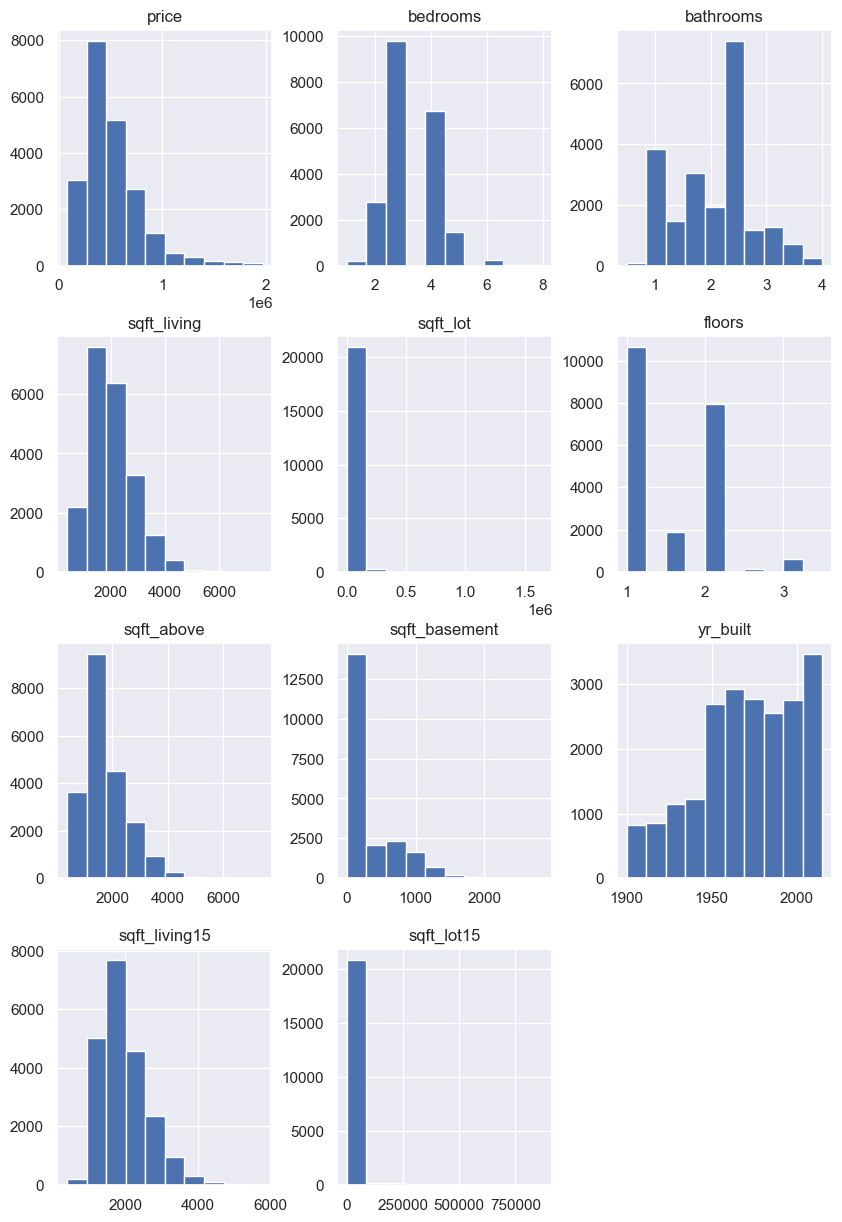

In [36]:
## Exploring the distributions of the df_no_mv
df_no_mv.select_dtypes('number').hist(figsize = (10,15));

In [37]:
## Taking a look at the descriptive statistics
df_no_mv.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.118300e+04,21183.000000,21183.000000,21183.000000,2.118300e+04,21183.000000,21183.000000,21183.000000,21183.000000,21183.000000,21183.000000
mean,5.128596e+05,3.346363,2.075650,2028.539961,1.475208e+04,1.485649,1748.049899,274.674834,1970.826229,1962.015390,12529.779351
std,2.773568e+05,0.876894,0.708096,826.109418,4.022804e+04,0.538159,764.023815,421.874014,29.282974,655.408434,26299.828731
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5.009500e+03,1.000000,1185.000000,0.000000,1951.000000,1480.000000,5082.500000
50%,4.470000e+05,3.000000,2.250000,1890.000000,7.560000e+03,1.000000,1540.000000,0.000000,1974.000000,1830.000000,7590.000000
75%,6.300000e+05,4.000000,2.500000,2500.000000,1.050000e+04,2.000000,2160.000000,530.000000,1996.000000,2330.000000,10000.000000
max,1.970000e+06,8.000000,4.000000,7620.000000,1.651359e+06,3.500000,7420.000000,2850.000000,2015.000000,5790.000000,871200.000000


<Axes: >

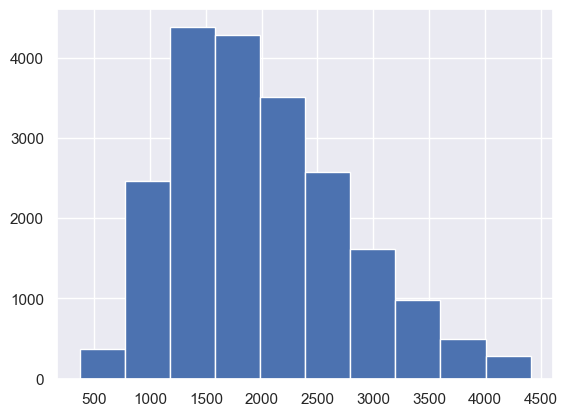

In [38]:
## Removing the outliers in the sqft_living column
sq_l = df_no_mv['sqft_living'].quantile(q = 0.99)
df_no_mv = df_no_mv[df_no_mv['sqft_living']<=sq_l]
df_no_mv['sqft_living'].hist()

In [39]:
df_no_mv['sqft_living'].describe()

count    20974.000000
mean      1999.358110
std        774.329691
min        370.000000
25%       1410.000000
50%       1880.000000
75%       2480.000000
max       4410.000000
Name: sqft_living, dtype: float64

<Axes: >

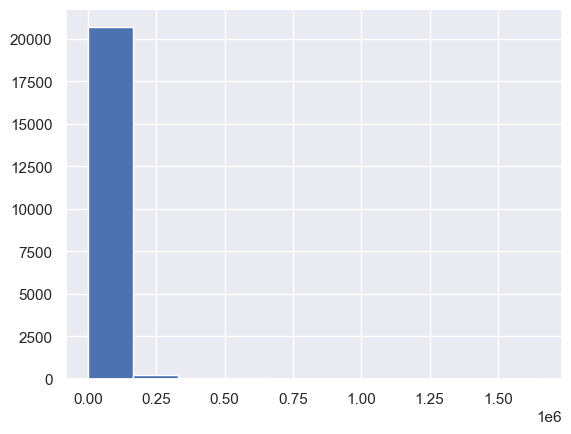

In [40]:
## Checking for outliers in the sqft_lot column
df_no_mv['sqft_lot'].hist()

In [41]:
## Removing the outliers in the sqft_lot column
sq_lot = df_no_mv['sqft_lot'].quantile(q = 0.95)
df_no_mv = df_no_mv[df_no_mv['sqft_lot']<=sq_lot]
sq_lot

40982.44999999996

In [42]:
df_no_mv['sqft_lot'].describe()

count    19925.000000
mean      8523.988156
std       6244.209079
min        520.000000
25%       5000.000000
50%       7333.000000
75%       9800.000000
max      40973.000000
Name: sqft_lot, dtype: float64

In [43]:
## Checking for outliers in the sqft_above column
df_no_mv['sqft_above'].describe()

count    19925.000000
mean      1698.324316
std        709.819664
min        370.000000
25%       1170.000000
50%       1510.000000
75%       2100.000000
max       4410.000000
Name: sqft_above, dtype: float64

In [44]:
## The sqft_above column has no extreme outliers

In [45]:
## Checking for outliers in the sqft_basement column
df_no_mv['sqft_basement'].describe()

count    19925.000000
mean       268.668356
std        407.932515
min          0.000000
25%          0.000000
50%          0.000000
75%        520.000000
max       2170.000000
Name: sqft_basement, dtype: float64

<Axes: >

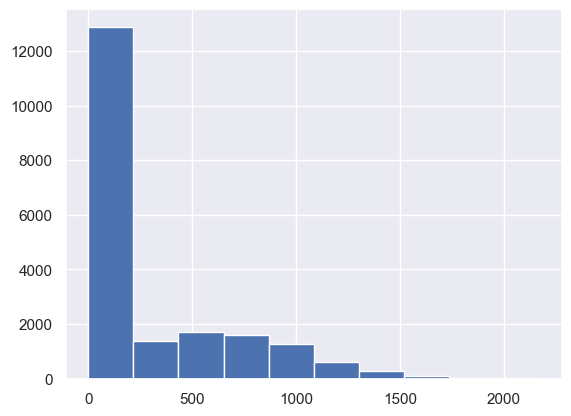

In [46]:
## Visualizing to see the outliers
df_no_mv['sqft_basement'].hist()

In [47]:
## Removing the outliers in the sqft_basement column
sq_base = df_no_mv['sqft_basement'].quantile(q = 0.99)
df_no_mv = df_no_mv[df_no_mv['sqft_basement']<=sq_base]
df_no_mv['sqft_basement'].describe()

count    19741.000000
mean       255.253736
std        384.993990
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       1500.000000
Name: sqft_basement, dtype: float64

In [48]:
## Checking for outliers in the sqft_living15 column
df_no_mv['sqft_living15'].describe()

count    19741.000000
mean      1915.281141
std        618.412808
min        399.000000
25%       1460.000000
50%       1790.000000
75%       2260.000000
max       5790.000000
Name: sqft_living15, dtype: float64

In [49]:
## Removing the outliers in the sqft_living15 column
sq_liv15 = df_no_mv['sqft_living15'].quantile(q = 0.99)
df_no_mv = df_no_mv[df_no_mv['sqft_living15']<=sq_liv15]
df_no_mv['sqft_living15'].describe()

count    19545.000000
mean      1893.760399
std        581.811239
min        399.000000
25%       1460.000000
50%       1780.000000
75%       2250.000000
max       3730.000000
Name: sqft_living15, dtype: float64

In [50]:
## Checking for outliers in the sqft_lot15 column
df_no_mv['sqft_lot15'].describe()

count     19545.000000
mean       8304.222666
std        7787.474729
min         651.000000
25%        5000.000000
50%        7350.000000
75%        9463.000000
max      335289.000000
Name: sqft_lot15, dtype: float64

In [51]:
## Removing the outliers in the sqft_lot15 column
sq_lot15 = df_no_mv['sqft_lot15'].quantile(q = 0.99)
df_no_mv = df_no_mv[df_no_mv['sqft_lot15']<=sq_lot15]
df_no_mv['sqft_lot15'].describe()

count    19350.000000
mean      7831.903876
std       4889.789655
min        651.000000
25%       5000.000000
50%       7326.000000
75%       9369.500000
max      36680.000000
Name: sqft_lot15, dtype: float64

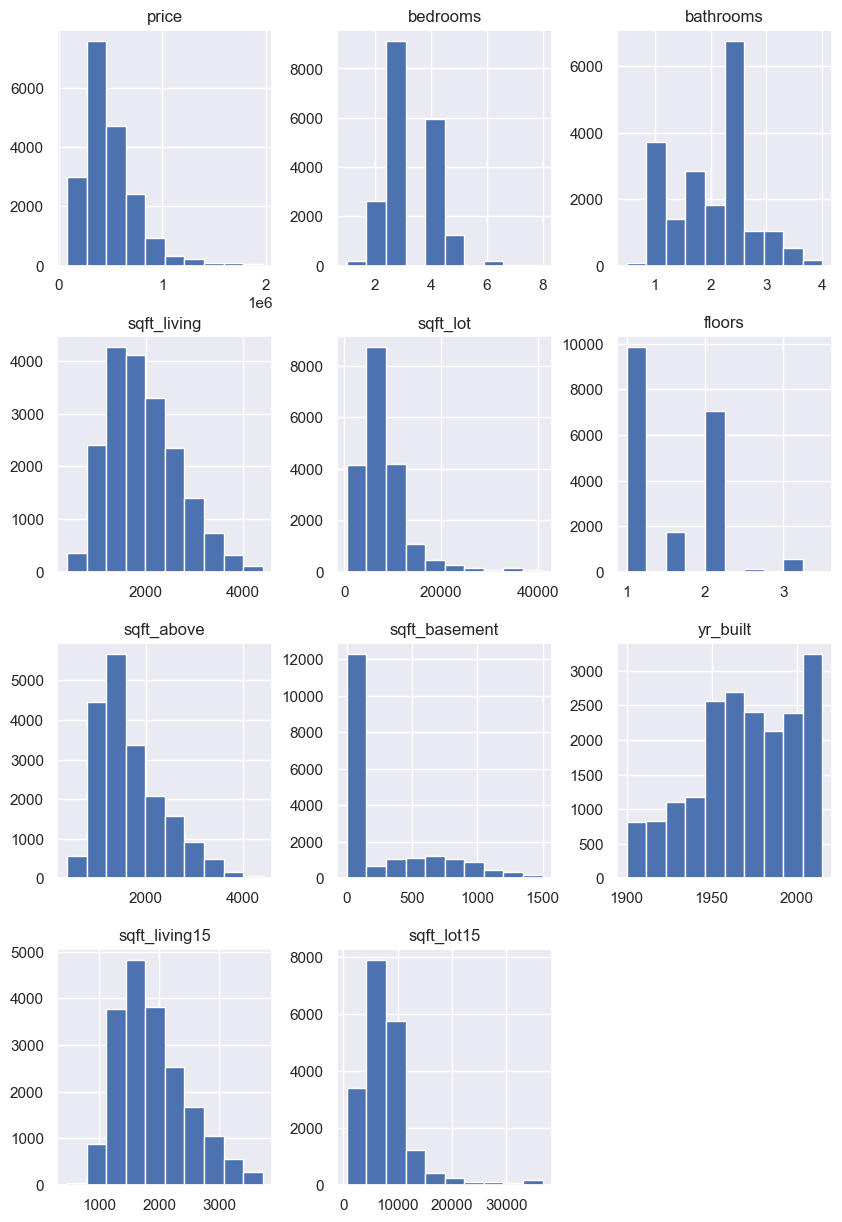

In [52]:
## Plotting the distributions of all the numerical columns in the df_no_mv dataframe
df_no_mv.select_dtypes('number').hist(figsize = (10,15));

There is an improvement from the previous distributions with the extreme outliers removed. Further modifications will be applied as the model is being improved.

### Feature engineering

In [53]:
## Taking a look at the dataframes info
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19350 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           19350 non-null  datetime64[ns]
 1   price          19350 non-null  float64       
 2   bedrooms       19350 non-null  int64         
 3   bathrooms      19350 non-null  float64       
 4   sqft_living    19350 non-null  int64         
 5   sqft_lot       19350 non-null  int64         
 6   floors         19350 non-null  float64       
 7   waterfront     19350 non-null  object        
 8   view           19350 non-null  object        
 9   condition      19350 non-null  object        
 10  grade          19350 non-null  object        
 11  sqft_above     19350 non-null  int64         
 12  sqft_basement  19350 non-null  float64       
 13  yr_built       19350 non-null  int64         
 14  sqft_living15  19350 non-null  int64         
 15  sqft_lot15     1935

Prices of houses may tend to change during different seasons.Converting the datetime column to a column containing the four seasons may help improve the model.

In [54]:
## Taking a look at the date column
df_no_mv['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [55]:
## Creating a dictionary containing seasons
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}
## Adding a seasons column
df_no_mv['Seasons'] = df_no_mv['date'].dt.month.map(seasons)

In [56]:
## Creating a new column without the date column
df_cleaned = df_no_mv.drop('date',axis = 1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19350 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19350 non-null  float64
 1   bedrooms       19350 non-null  int64  
 2   bathrooms      19350 non-null  float64
 3   sqft_living    19350 non-null  int64  
 4   sqft_lot       19350 non-null  int64  
 5   floors         19350 non-null  float64
 6   waterfront     19350 non-null  object 
 7   view           19350 non-null  object 
 8   condition      19350 non-null  object 
 9   grade          19350 non-null  object 
 10  sqft_above     19350 non-null  int64  
 11  sqft_basement  19350 non-null  float64
 12  yr_built       19350 non-null  int64  
 13  sqft_living15  19350 non-null  int64  
 14  sqft_lot15     19350 non-null  int64  
 15  Seasons        19350 non-null  object 
dtypes: float64(4), int64(7), object(5)
memory usage: 2.5+ MB


### Creating Dummy variables